<a href="https://colab.research.google.com/github/raffiainuls/Tugasbesar/blob/develop/augmentasi_splitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cifar-10 Image Classifiction**

The CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.


1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

**LOAD DATASET**

In [1]:
!kaggle datasets download -d pankrzysiu/cifar10-python

cifar10-python.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
api_token = {"username":"hanifnurfauzi","key":"ee0b8c9181ca9ea8c7696d48a41280a9"}
import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!unzip "/content/cifar10-python.zip" -d "/content"

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [8]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [9]:
def visualize_data(images, categories, class_names):
    fig = plt.figure(figsize=(14, 6))
    fig.patch.set_facecolor('white')
    for i in range(3 * 7):
        plt.subplot(3, 7, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i])
        class_index = categories[i].argmax()
        plt.xlabel(class_names[class_index])
    plt.show()

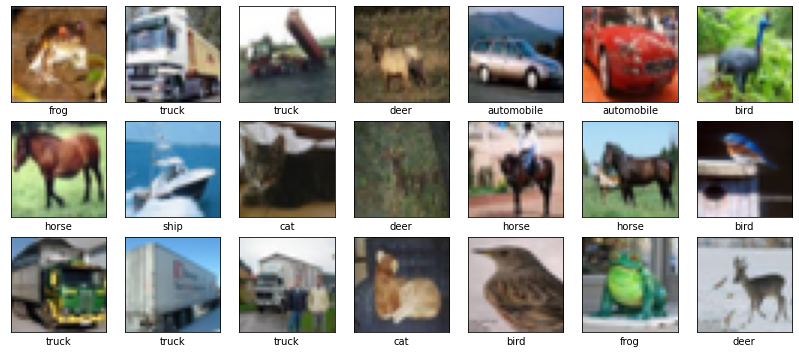

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train / 255.0
y_train = to_categorical(y_train, num_classes)

X_test = X_test / 255.0
y_test = to_categorical(y_test, num_classes)

visualize_data(X_train, y_train, class_names)

In [11]:
y_train.shape

(50000, 10)

# DATA AUGMENTASI

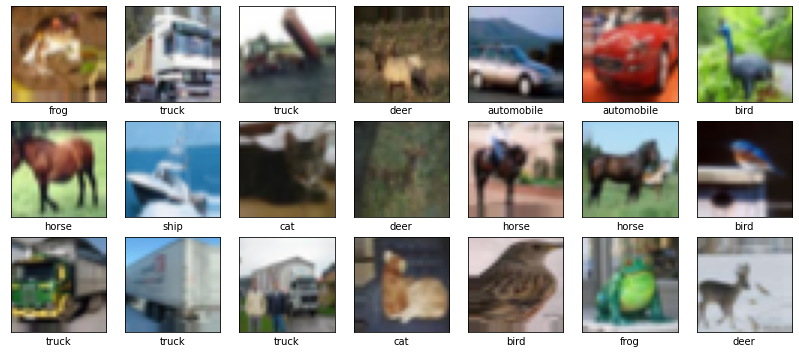

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
width_shift = 3/32
height_shift = 3/32
flip = True

datagen = ImageDataGenerator(
    horizontal_flip=flip,
    width_shift_range=width_shift,
    height_shift_range=height_shift,
    )
datagen.fit(X_train)

it = datagen.flow(X_train, y_train, shuffle=False)
batch_images, batch_labels = next(it)
visualize_data(batch_images, batch_labels, class_names)

# SPLITTING DATA

In [15]:
import cv2
from pathlib import Path
from tqdm import tqdm
import pickle

with open('cifar-10-batches-py/batches.meta', 'rb') as fo:
	dict_meta = pickle.load(fo, encoding='bytes')
label_names = dict_meta[b'label_names']

In [16]:
# Training and validation sets
single_train_number = 9000
train_paths = ['cifar-10-batches-py/data_batch_1','cifar-10-batches-py/data_batch_2','cifar-10-batches-py/data_batch_3',
				'cifar-10-batches-py/data_batch_4','cifar-10-batches-py/data_batch_5']
				
for i in tqdm(range(len(train_paths))):
	with open(train_paths[i], 'rb') as fo:
		dict = pickle.load(fo, encoding='bytes')
		
	for j in tqdm(range(single_train_number-1)):
		path = Path("./cifar-10-batches-py/train/")
		tag = str(label_names[dict[b'labels'][j]])+'_'+str(dict[b'labels'][j])
		path = path/tag
		if path.exists()==False :
			path.mkdir(parents=True)
		image_path = "./cifar-10-batches-py/train/"+tag+'/'+tag+'_'+str((i+1)*j)+'.jpg'
		a = dict[b'data'][j]
		b = a[0:1024].reshape((32,32),order='C')[:,:,np.newaxis]
		c = a[1024:2048].reshape((32,32),order='C')[:,:,np.newaxis]
		d = a[2048:3072].reshape((32,32),order='C')[:,:,np.newaxis]
		img = np.concatenate((b,c,d),axis = 2)
		cv2.imwrite(image_path, img)
		
	for j in tqdm(range(len(dict[b'data'])-single_train_number)):
		path = Path("./cifar-10-batches-py/val/")
		j = j + single_train_number
		tag = str(label_names[dict[b'labels'][j]])+'_'+str(dict[b'labels'][j])
		path = path/tag
		if path.exists()==False :
			path.mkdir(parents=True)
		image_path = "./cifar-10-batches-py/val/"+tag+'/'+tag+'_'+str((i+1)*j)+'.jpg'
		a = dict[b'data'][j]
		b = a[0:1024].reshape((32,32),order='C')[:,:,np.newaxis]
		c = a[1024:2048].reshape((32,32),order='C')[:,:,np.newaxis]
		d = a[2048:3072].reshape((32,32),order='C')[:,:,np.newaxis]
		img = np.concatenate((b,c,d),axis = 2)
		cv2.imwrite(image_path, img)


100%|██████████| 8999/8999 [00:01<00:00, 7575.25it/s]

100%|██████████| 8999/8999 [00:01<00:00, 7039.43it/s]

100%|██████████| 8999/8999 [00:01<00:00, 6589.00it/s]

100%|██████████| 8999/8999 [00:01<00:00, 5125.48it/s]

100%|██████████| 8999/8999 [00:01<00:00, 7212.62it/s]

100%|██████████| 5/5 [00:07<00:00,  1.55s/it]


In [18]:
# Test set
test_path = 'cifar-10-batches-py/test_batch'
 
with open(test_path, 'rb') as fo:
	dict = pickle.load(fo, encoding='bytes')
		
for j in tqdm(range(len(dict[b'labels']))):
	path = Path("./cifar-10-batches-py/test/")
	tag = str(label_names[dict[b'labels'][j]])+'_'+str(dict[b'labels'][j])
	path = path/tag
	if path.exists()==False :
		path.mkdir(parents=True)
	image_path = "./cifar-10-batches-py/test/"+tag+'/'+tag+'_'+str((i+1)*j)+'.jpg'
	a = dict[b'data'][j]
	b = a[0:1024].reshape((32,32),order='C')[:,:,np.newaxis]
	c = a[1024:2048].reshape((32,32),order='C')[:,:,np.newaxis]
	d = a[2048:3072].reshape((32,32),order='C')[:,:,np.newaxis]
	img = np.concatenate((b,c,d),axis = 2)
	cv2.imwrite(image_path, img)

100%|██████████| 10000/10000 [00:01<00:00, 8191.39it/s]
